### Principle Component Analysis_Harshini _Tammareddy

In [1]:
## Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# PCA 
from sklearn.decomposition import PCA 

import dataframe_image as dfi
import seaborn as sns
%matplotlib inline

In [2]:
##loading data
df = pd.read_csv('ESS1-9e01_1.csv')
df.head() #output 

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
0,AT,ESS1-9e01,1.0,10.12.2020,10724,ESS9e03,9,3,27,0.581174,...,2,2,2,2,2,2,2,3,2,3
1,AT,ESS1-9e01,1.0,10.12.2020,10725,ESS9e03,9,3,137,1.062772,...,3,4,3,5,2,3,2,3,3,3
2,AT,ESS1-9e01,1.0,10.12.2020,10726,ESS9e03,9,3,194,1.376509,...,2,3,2,3,2,3,3,3,3,3
3,AT,ESS1-9e01,1.0,10.12.2020,10727,ESS9e03,9,3,208,0.993399,...,1,1,1,6,1,1,1,1,2,3
4,AT,ESS1-9e01,1.0,10.12.2020,10728,ESS9e03,9,3,220,0.377353,...,2,6,2,6,1,3,2,1,1,3


In [3]:
df.shape

(46276, 34)

In [4]:
df.dtypes

cntry        object
cname        object
cedition    float64
cproddat     object
cseqno        int64
name         object
essround      int64
edition       int64
idno          int64
dweight     float64
pspwght     float64
pweight     float64
anweight    float64
ipcrtiv       int64
imprich       int64
ipeqopt       int64
ipshabt       int64
impsafe       int64
impdiff       int64
ipfrule       int64
ipudrst       int64
ipmodst       int64
ipgdtim       int64
impfree       int64
iphlppl       int64
ipsuces       int64
ipstrgv       int64
ipadvnt       int64
ipbhprp       int64
iprspot       int64
iplylfr       int64
impenv        int64
imptrad       int64
impfun        int64
dtype: object

In [5]:
#dropping variables & columns not needed for analysis 

df = df.iloc[:,13:40]
#ipcrtiv
df = df[df['ipcrtiv'] != 7]
df = df[df['ipcrtiv'] != 8]
df = df[df['ipcrtiv'] != 9]
# imprich
df = df[df['imprich'] != 7]
df = df[df['imprich'] != 8]
df = df[df['imprich'] != 9]
#ipeqopt
df = df[df['ipeqopt'] != 7]
df = df[df['ipeqopt'] != 8]
df = df[df['ipeqopt'] != 9]
#ipshabt
df = df[df['ipshabt'] != 7]
df = df[df['ipshabt'] != 8]
df = df[df['ipshabt'] != 9]
#impsafe
df = df[df['impsafe'] != 7]
df = df[df['impsafe'] != 8]
df = df[df['impsafe'] != 9]

#impdiff
df = df[df['impdiff'] != 7]
df = df[df['impdiff'] != 8]
df = df[df['impdiff'] != 9]
#ipfrule
df = df[df['ipfrule'] != 7]
df = df[df['ipfrule'] != 8]
df = df[df['ipfrule'] != 9]
#ipudrst
df = df[df['ipudrst'] != 7]
df = df[df['ipudrst'] != 8]
df = df[df['ipudrst'] != 9]
#ipmodst
df = df[df['ipmodst'] != 7]
df = df[df['ipmodst'] != 8]
df = df[df['ipmodst'] != 9]
#ipgdtim
df = df[df['ipgdtim'] != 7]
df = df[df['ipgdtim'] != 8]
df = df[df['ipgdtim'] != 9]

#impfree
df = df[df['impfree'] != 7]
df = df[df['impfree'] != 8]
df = df[df['impfree'] != 9]
#iphlppl
df = df[df['iphlppl'] != 7]
df = df[df['iphlppl'] != 8]
df = df[df['iphlppl'] != 9]
#ipsuces
df = df[df['ipsuces'] != 7]
df = df[df['ipsuces'] != 8]
df = df[df['ipsuces'] != 9]
#ipstrgv

df = df[df['ipstrgv'] != 7]
df = df[df['ipstrgv'] != 8]
df = df[df['ipstrgv'] != 9]

#ipadvnt
df = df[df['ipadvnt'] != 7]
df = df[df['ipadvnt'] != 8]
df = df[df['ipadvnt'] != 9]

#ipbhprp

df = df[df['ipbhprp'] != 7]
df = df[df['ipbhprp'] != 8]
df = df[df['ipbhprp'] != 9]

#iprspot
df = df[df['iprspot'] != 7]
df = df[df['iprspot'] != 8]
df = df[df['iprspot'] != 9]

#iplylfr
df = df[df['iplylfr'] != 7]
df = df[df['iplylfr'] != 8]
df = df[df['iplylfr'] != 9]

#impenv
df = df[df['impenv'] != 7]
df = df[df['impenv'] != 8]
df = df[df['impenv'] != 9]

#imptrad
df = df[df['imptrad'] != 7]
df = df[df['imptrad'] != 8]
df = df[df['imptrad'] != 9]

#impfun
df = df[df['impfun'] != 7]
df = df[df['impfun'] != 8]
df = df[df['impfun'] != 9]

In [6]:
df.shape #shape

(42425, 21)

In [7]:
## Check missing
df.isnull().sum()

ipcrtiv    0
imprich    0
ipeqopt    0
ipshabt    0
impsafe    0
impdiff    0
ipfrule    0
ipudrst    0
ipmodst    0
ipgdtim    0
impfree    0
iphlppl    0
ipsuces    0
ipstrgv    0
ipadvnt    0
ipbhprp    0
iprspot    0
iplylfr    0
impenv     0
imptrad    0
impfun     0
dtype: int64

In [8]:
df.corr()

,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
ipcrtiv,1.000000,0.178506,0.214863,0.243340,0.052427,0.389954,0.010086,0.251559,0.024066,0.243960,...,0.239109,0.248743,0.106215,0.286664,0.029598,0.113773,0.212825,0.207327,0.019433,0.271287
imprich,0.178506,1.000000,-0.060365,0.329434,0.074192,0.189448,0.091574,-0.090662,-0.151013,0.222653,...,-0.117113,0.371346,0.062460,0.295439,0.000892,0.253042,-0.062088,-0.088334,0.013947,0.182897
ipeqopt,0.214863,-0.060365,1.000000,0.125992,0.184013,0.156484,0.066018,0.368459,0.224755,0.124102,...,0.364071,0.064070,0.208417,0.043108,0.157397,0.037914,0.323082,0.301938,0.071728,0.150442
ipshabt,0.243340,0.329434,0.125992,1.000000,0.216551,0.272306,0.106183,0.086959,-0.019967,0.218197,...,0.116183,0.521885,0.151093,0.255359,0.134399,0.386062,0.109713,0.081575,0.091962,0.230767
impsafe,0.052427,0.074192,0.184013,0.216551,1.000000,0.041651,0.231424,0.130393,0.248371,0.066142,...,0.193752,0.175935,0.413532,-0.135094,0.354740,0.240694,0.200303,0.220110,0.281301,0.039955
impdiff,0.389954,0.189448,0.156484,0.272306,0.041651,1.000000,0.056833,0.239528,0.020652,0.357357,...,0.212230,0.296566,0.099418,0.467162,0.019678,0.119983,0.191225,0.159786,0.026235,0.400092
ipfrule,0.010086,0.091574,0.066018,0.106183,0.231424,0.056833,1.000000,0.128515,0.187331,-0.032346,...,0.098742,0.141378,0.240022,-0.038491,0.326785,0.211934,0.088126,0.099093,0.243430,0.028308
ipudrst,0.251559,-0.090662,0.368459,0.086959,0.130393,0.239528,0.128515,1.000000,0.284619,0.173229,...,0.420895,0.089670,0.186332,0.093019,0.185298,0.052225,0.379769,0.320010,0.082808,0.176340
ipmodst,0.024066,-0.151013,0.224755,-0.019967,0.248371,0.020652,0.187331,0.284619,1.000000,0.006992,...,0.277805,-0.023043,0.204176,-0.108199,0.317663,0.045738,0.202096,0.199306,0.181352,0.012712
ipgdtim,0.243960,0.222653,0.124102,0.218197,0.066142,0.357357,-0.032346,0.173229,0.006992,1.000000,...,0.171080,0.264332,0.087066,0.355790,0.019730,0.156784,0.225130,0.107565,-0.020330,0.482627


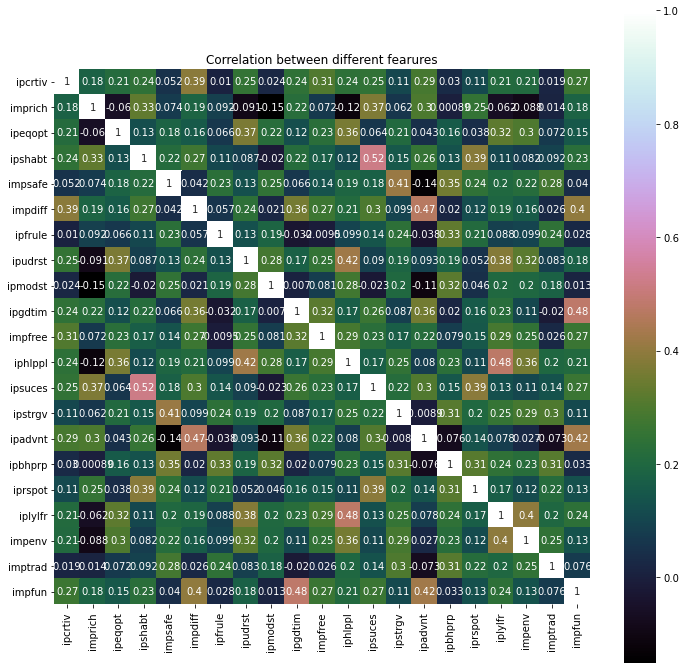

In [9]:
## correlation matrix
correlation = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')
plt.savefig("correlation.png")


In [10]:
## Standardize
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [11]:
df_std = pd.DataFrame(s.fit_transform(df),
                  columns=df.columns)

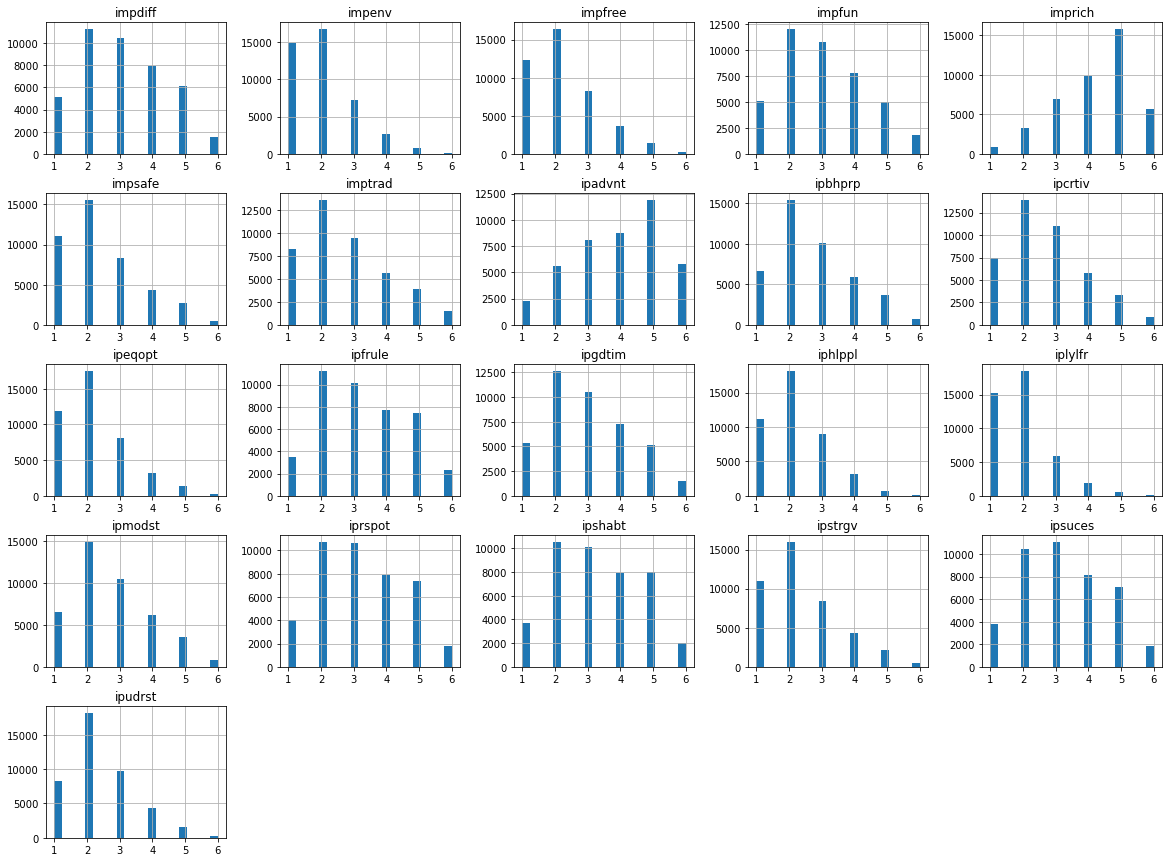

In [12]:
## Visualize data
num_bins = 21

df.hist(bins = num_bins, figsize=(20,15))
plt.savefig("HistogramPlots")
plt.show()

In [13]:
## Instantiate model object
pca = PCA(n_components=4)

In [14]:
## Fit model
mod = pca.fit(df_std)


In [15]:
# Get loadings with items 
pd.DataFrame(mod.components_.T,
            index=df_std.columns).style.background_gradient(cmap='seismic')

,0,1,2,3
ipcrtiv,0.233027,-0.171216,-0.147962,-0.147263
imprich,0.109144,-0.301736,0.316684,-0.048973
ipeqopt,0.218371,0.139442,-0.233679,-0.219791
ipshabt,0.230364,-0.192758,0.271813,-0.303857
impsafe,0.201065,0.229457,0.246860,-0.158670
impdiff,0.248359,-0.252105,-0.121110,0.215111
ipfrule,0.132460,0.172459,0.280243,0.416411
ipudrst,0.244183,0.133416,-0.277419,0.047400
ipmodst,0.142631,0.303049,-0.060926,0.317975
ipgdtim,0.226077,-0.253724,-0.107520,0.237201


In [16]:
## Get % of variance explained by each component
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2", "PC3","PC4"]).T

,PC1,PC2,PC3,PC4
0,22.0,13.0,10.0,5.0


In [17]:
## Get cumulative variance explained by 4 components
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2", "PC3","PC4"]).T.sum(axis=1)

0    50.0
dtype: float64

In [18]:
## View PCs and loadings and give PCs sensible labels for interpretation
pd.DataFrame(mod.components_.T,
            index=df_std.columns,
            columns=["Overall Human values","Traditional vs Contemporary",
                    "Elitist vs Egalitarian", "Ambitious vs common man"])

,Overall Human values,Traditional vs Contemporary,Elitist vs Egalitarian,Ambitious vs common man
ipcrtiv,0.233027,-0.171216,-0.147962,-0.147263
imprich,0.109144,-0.301736,0.316684,-0.048973
ipeqopt,0.218371,0.139442,-0.233679,-0.219791
ipshabt,0.230364,-0.192758,0.271813,-0.303857
impsafe,0.201065,0.229457,0.246860,-0.158670
impdiff,0.248359,-0.252105,-0.121110,0.215111
ipfrule,0.132460,0.172459,0.280243,0.416411
ipudrst,0.244183,0.133416,-0.277419,0.047400
ipmodst,0.142631,0.303049,-0.060926,0.317975
ipgdtim,0.226077,-0.253724,-0.107520,0.237201


In [19]:
## View PCs and loadings and give PCs sensible labels for interpretation, add color for clarity
df = pd.DataFrame(mod.components_.T,
            index=df_std.columns,
            columns=["Overall Human values","Traditional vs Contemporary",
                    "Elitist vs Egalitarian", "Ambitious vs common man"]).style.background_gradient(cmap='seismic')

dfi.export(df,"mytable.png")
df

,Overall Human values,Traditional vs Contemporary,Elitist vs Egalitarian,Ambitious vs common man
ipcrtiv,0.233027,-0.171216,-0.147962,-0.147263
imprich,0.109144,-0.301736,0.316684,-0.048973
ipeqopt,0.218371,0.139442,-0.233679,-0.219791
ipshabt,0.230364,-0.192758,0.271813,-0.303857
impsafe,0.201065,0.229457,0.246860,-0.158670
impdiff,0.248359,-0.252105,-0.121110,0.215111
ipfrule,0.132460,0.172459,0.280243,0.416411
ipudrst,0.244183,0.133416,-0.277419,0.047400
ipmodst,0.142631,0.303049,-0.060926,0.317975
ipgdtim,0.226077,-0.253724,-0.107520,0.237201


#### Hyper parameter

In [24]:
## Instantiate model object
pca = PCA(n_components=0.7,
         svd_solver="full")

In [25]:
## Fit model
mod = pca.fit(df_std)

In [26]:
mod.explained_variance_ratio_

array([0.21830041, 0.12808241, 0.09525889, 0.04695738, 0.04459435,
       0.0413016 , 0.04018267, 0.03530369, 0.03427339, 0.0315042 ])

In [27]:
## Get % of variance explained 
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"]).T.sum(axis=1)

0    72.0
dtype: float64

In [28]:
## Build df with number of components and explained variance
pc_df = pd.DataFrame(mod.explained_variance_ratio_,
                             index=np.arange(pca.n_components_) + 1,
                             columns=["perc_var"])

In [29]:
## Reset index, rename components (for plotting w/ altair)
pc_df = pc_df.reset_index()
pc_df = pc_df.rename(columns={"index":"components"}) 

In [30]:
## Import altair
import altair as alt

In [32]:
## Create scree plot with altair
alt.Chart(pc_df).mark_line().encode(x="components",
                                    y="perc_var").interactive()

alt.Chart(...)